<a href="https://colab.research.google.com/github/Gkcoli/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [359]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [360]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [361]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [362]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

for i in range(len(labels)):
   if labels[i] >= 3:
      labels[i] = 1
   else:
      labels[i] = 0

training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [363]:
dataset['rating'].value_counts()

,count
rating,
1,299
5,249
4,249
3,123
2,81


In [364]:
# Convert rating inplace to 1 if >= 3, else 0
dataset['rating'] = dataset['rating'].apply(lambda x: 1 if x >= 3 else 0)

## 1. Tokenize the data

In [365]:
vocab_size = 4000 # Increased vocab_size
embedding_dim = 32 # Increased embedding_dim
max_length = 100 # Increased max_length
trunc_type='post'
padding_type='post'
oov_tok = ""

## 2. Sequence the data

In [366]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(dataset['review'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(dataset['review'])
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [367]:
len(word_index)

3537

## 3. Pad the data

In [368]:
print(padded[0])
padded.shape

[ 701   81 1733  419   78    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


(1001, 100)

## 4. Train a sentiment model

In [369]:
from sklearn.model_selection import train_test_split
import numpy as np
labels = np.array(dataset['rating'])


In [370]:
training_padded, testing_padded, training_labels, testing_labels = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)

In [371]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'), # Increased neurons in Dense layer
    tf.keras.layers.Dense(16, activation='relu'), # Added another Dense layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [372]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_26     │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [373]:
num_epochs = 50 # Increased epochs
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5860 - loss: 0.6826 - val_accuracy: 0.6219 - val_loss: 0.6655
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6279 - loss: 0.6567 - val_accuracy: 0.6219 - val_loss: 0.6646
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6047 - loss: 0.6662 - val_accuracy: 0.6219 - val_loss: 0.6624
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6338 - loss: 0.6541 - val_accuracy: 0.6219 - val_loss: 0.6600
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6091 - loss: 0.6588 - val_accuracy: 0.6219 - val_loss: 0.6551
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6322 - loss: 0.6416 - val_accuracy: 0.6169 - val_loss: 0.6481
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6514 - loss: 0.6294 - val_accuracy: 0.6318 - val_loss: 0.6374
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6666 - loss: 0.6102 - val_accuracy: 0.6667 - val_loss

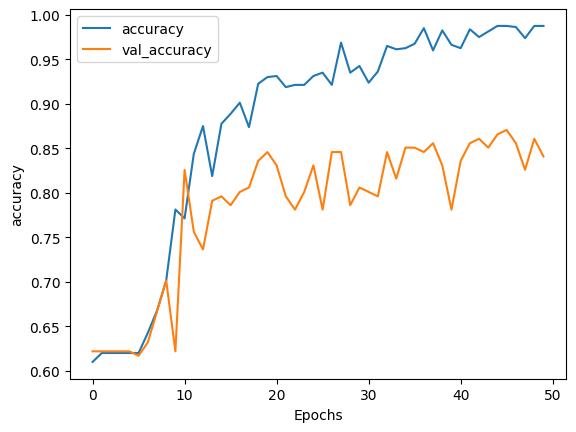

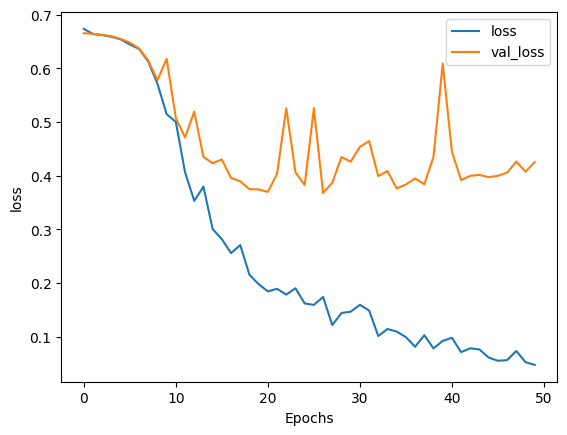

In [374]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualing the network

In [375]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(4000, 32)


In [377]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# Iterate through the keys that are actually in the reverse_word_index
for word_num in reverse_word_index.keys():
    # Ensure we don't write the OOV token (which is at index 1 according to the traceback)
    if word_num == 1:
        continue
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## 5. Predict sentiment with new reviews

In [380]:
# answer here
fake_reviews = ['anong klaseng seller to bagal kausap',
                'dinako bibili ulit bonak ng seller',
                'sakto lang to',
                'gago ayos pagkagawa',
                'ano yang item nayan bulok',
                'bibili ulit ako',
                'super ganda',
                'tang ina ang pangit ng item tapon koto']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['anong klaseng seller to bagal kausap', 'dinako bibili ulit bonak ng seller', 'sakto lang to', 'gago ayos pagkagawa', 'ano yang item nayan bulok', 'bibili ulit ako', 'super ganda', 'tang ina ang pangit ng item tapon koto']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
anong klaseng seller to bagal kausap
[0.40914065]


dinako bibili ulit bonak ng seller
[0.4400368]


sakto lang to
[0.7640014]


gago ayos pagkagawa
[0.4827808]


ano yang item nayan bulok
[0.27853975]


bibili ulit ako
[0.6811222]


super ganda
[0.95663655]


tang ina ang pangit ng item tapon koto
[0.29073724]


